# Modelo matemático de un dron quadcopter

El modelaje se va a realizar consideranco que el mismo consiste en un cuerpo rígido (simétrico en el plano xy) unido a otros 4 cuerpos rígidos mucho más pequeños, los cuales son los 4 rotores/hélices del dron. Dichas 4 hélices giran en pares, es decir, dos rotores giran de forma horaria y dos en forma antihoraria, generando la fuerzas que utiliza el dron para movilizarse. Las fuerza que genera la rotación de cada hélice se considerará proporcional a la velocidad de rotación del rotor en cuestión.

Además, se considera fricción con el viente en dos formas, una en un régimen lineal con la velocidad translacional del dron y la otra cuadrática con la velocidad de rotación. 

Por el momento se realizarán las consideraciones dinámicas completas.

# Mecánica del cuerpo rígido

Para modelar un cuerpo rígido se requiere modelar la translación de su centro de masa utilizando las leyes de Newton y hay que modelar como se orienta el cuerpo (como "gira" en el espacio por el que se mueve, cambiando su orientación), por lo cuál se deberán obtener 6 ecuaciones diferenciales de segundo orden que describen la totalidad del movimiento. 

Se propone los siguientes vectores para describir la posición y orientación del cuerpo:

$$\vec{\xi} = \begin{pmatrix} 
					x \\
					y \\
					z \\
					\end{pmatrix}
$$

$$\vec{\eta} = \begin{pmatrix} 
					\phi \\
					\theta \\
					\psi \\
					\end{pmatrix}
$$

Donde $\phi$,$\theta$ y $\psi$ son los ángulos de Tait-Bryan, también conocidos como los ángulos de Euler o solo como "yaw, pitch and roll". En está ocasión se define que $\phi$ es la rotación en el eje x, $\theta$ la rotación en el eje y y $\psi$ es la rotación en el eje z. Al ser ángulos de Tait-Bryan estos se definen desde el marco de referencia inercial en el suelo.

Se coloca un marco de referencia inercial en el suelo y un marco de referencia no inercial que sigue al cuerpo y su orientación, en el centro de masa del cuerpo.

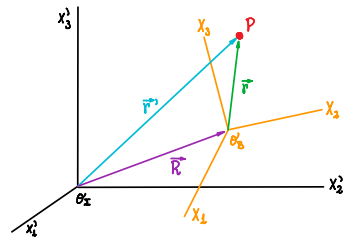

Para convertir entre los marcos de referencia, se utiliza la transformación galileana tomando en cuenta que el marco de referencia no inercial (de ahora en adelante llamado marco de referencia del cuerpo) puede tener una orientación arbitraria, se introduce una matriz de rotación ortogonal R que permite pasar un vector de la orientación del marco inercial a la orientación del marco del cuerpo:

$$\vec{r}' = R^{-1} \vec{r} + \vec{R}  \Leftrightarrow \vec{r} = R \left( \vec{r}' -\vec{R} \right)$$

Donde R es:

$$

R = \begin{bmatrix}
		cos\left( \psi\right) cos\left( \theta\right) & sin\left( \psi\right) cos\left( \theta\right) & -sin\left( \theta \right) \\

		cos\left( \psi\right)sin\left( \theta\right)sin\left( \phi\right)-sin\left( \psi\right)cos\left( \phi\right) & sin\left( \psi\right)sin\left( \theta\right)sin\left( \phi\right) + cos\left( \psi\right)cos\left( \phi\right) & cos\left( \theta\right)sin\left( \phi\right) \\

		cos\left( \psi\right)sin\left( \theta\right)cos\left( \phi\right)+sin\left( \psi\right)sin\left( \phi\right) & sin\left( \psi\right)sin\left( \theta\right)cos\left( \phi\right) - cos\left( \psi\right)sin\left( \phi\right) & cos\left( \theta\right)cos\left( \phi\right)


	\end{bmatrix}

	= R_{x}\left( \phi \right) R_{y}\left( \theta \right) R_{z}\left( \psi \right)

$$


$$
\begin{align*}
R_{x}\left( \phi \right) = \begin{bmatrix}
								1 & 0 & 0\\
								0 & cos\left( \phi \right) & sin\left( \phi \right) \\
								0 & -sin\left( \phi \right) & cos\left( \phi \right)
							\end{bmatrix}

\;\;
& 
\;\;

R_{y}\left( \theta \right) = \begin{bmatrix}
								cos\left( \theta \right) & 0 & -sin\left( \theta \right) \\
								0 & 1 & 0 \\
								sin\left( \theta \right) & 0 & cos\left( \theta \right)
							\end{bmatrix}

\;\;
& 
\;\;

R_{z}\left( \psi \right) = \begin{bmatrix}
								cos\left( \psi \right) & sin\left( \theta \right) & 0\\
								-sin\left( \theta \right) & cos\left( \psi \right) & 0 \\
								0 & 0 & 1
							\end{bmatrix}

\end{align*}
$$

Recordar que son matrices de rotación (pasiva) ortogonales


## Por otro lado

El marco de referencia del cuerpo tendrá asociado un vector de velocidades angulares y este se debe relacionar, según las convención de ángulos de Euler, a la derivada del vector de orientación en el marco inercial, para hacer esto de debe hacer la derivada temporal de la transformación galileana:

$$ 
\begin{align*}
\dot{\vec{r}} &= \dot{R} \left( \vec{r}' - \vec{R}\right) +R \left( \dot{\vec{r}'} - \dot{\vec{R}}\right) \\
&= \dot{R} R^{T} R \left( \vec{r}' - \vec{R}\right) + R \left( \dot{\vec{r}'} - \dot{\vec{R}}\right) \\
&= \dot{R} R^{T} R \vec{r} + R \left( \dot{\vec{r}'} - \dot{\vec{R}}\right) \\

\Rightarrow \dot{R} R^{T} &= \hat{\omega}^{T}_{x} \Rightarrow \hat{\omega}_{x} = R \dot{R}^{T} \to \hat{\omega}_{x} \vec{A} = \vec{\omega} \times \vec{A}
\end{align*}
$$

$$\vec{\omega} = W \dot{\vec{\eta}}$$


$$
\begin{align*}

W = \begin{bmatrix}
		1 & 0 & -sin\left( \theta \right) \\
		0 & cos\left( \phi \right) & cos\left( \theta \right) sin\left( \phi \right) \\
		0 & -sin\left( \phi \right) & cos\left( \theta \right) cos\left( \phi \right)
	\end{bmatrix}

\;\;
&
\;\;

W^{-1} = \begin{bmatrix}
			1 & sin\left( \phi \right) tan\left( \theta \right) & cos\left( \phi \right)tan\left( \theta \right) \\
			0 & cos\left( \phi \right) & -sin\left( \phi \right) \\
			0 & sin\left( \phi \right)sec\left( \theta \right) & cos\left( \phi \right) sec\left( \theta \right)
		\end{bmatrix}

\end{align*}

$$
Esta matriz de transformación NO es ortogonal, la inversa NO existe si $\theta = \frac{n \pi}{2}$ con $n \epsilon \mathbb{N}\setminus\begin{Bmatrix}
0\end{Bmatrix}$

In [48]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['notebook','science', 'grid'])
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
mechanics_printing()

# Definición de las variables simbólicas

In [49]:
x, y, z, phi,theta, psi, omx,omy,omz = dynamicsymbols(r'x,y,z,\phi,\theta, \psi, \omega_x,\omega_y,\omega_z')
t = dynamicsymbols._t

om1,om2,om3,om4 = dynamicsymbols(r'\omega_1, \omega_2, \omega_3 , \omega_4')

k, b, cx,cy,cz , l , Ixx, Iyy, Izz , Irxx, Iryy , Irzz, g, M = smp.symbols(r'k, b,c_x, c_y, c_z, l, I_{xx},I_{yy},I_{zz}, I_{rxx}, I_{ryy}, I_{rzz}, g, M', positive = True)

In [50]:
Icuerpo = smp.Matrix([[Ixx,0,0],[0,Iyy,0],[0,0,Izz]])
Irotor = smp.Matrix([[Irxx,0,0],[0,Iryy,0],[0,0,Irzz]])

# Fuerzas y Torques que siente el sistema (Cuerpo del dron + los 4 rotores)

In [51]:
# Todos en el marco del cuerpo
Tv = smp.Matrix([0,0,k*(om1**2 + om2**2 + om3**2 + om4**2)]) # Empuje total generado por las hélices
Nxv = l*k*(om2**2-om4**2) # Torque alrededor del eje x
Nyv = l*k*(-om1**2 + om4**2) # Torque alrededor del eje y
Nzv = b*(-om1**2 + om2**2 -om3**2 + om4**2) # Torque alrededor del eje z
N = smp.Matrix([Nxv,Nyv,Nzv]) # Vector de torques generados por las hélices

In [52]:
# Posición del centro de masa, velocidad y aceleración en marco inercial

rp = smp.Matrix([x,y,z]) # Posición del centro de masa
drp = smp.diff(rp, t) # Velocidad del centro de masa
ddrp = smp.diff(rp, t, 2) # Aceleración del centro de masa

# Velocidad y Aceleración angular desde el marco del cuerpo

omega = smp.Matrix([omx,omy,omz]) # Velocidad angular del cuerpo
domega = smp.diff(omega, t) # Aceleración angular del cuerpo

omega_rotor = 4*omega+smp.Matrix([0,0,om1-om2+om3-om4])
# Vector orientación

eta = smp.Matrix([phi, theta, psi]) # Ángulos de Euler ----> Tait-Bryan (YXZ)
deta = smp.diff(eta, t) # Derivada de los ángulos de Euler

# Relación entre los angulos de Euler derivados respecto al tiempo y las velocidades angulares del cuerpo

W = smp.Matrix( [[1,0,-smp.sin(theta)],
				[0, smp.cos(phi),smp.cos(theta)*smp.sin(phi)],
				[0, -smp.sin(phi), smp.cos(theta)*smp.cos(phi)]]) # Matriz de transformación entre deta y omega (omega = W*deta)

W_inv = W.inv().applyfunc(smp.simplify) # Inversa de la matriz W, relacionada deta con omega (deta = W^-1*omega)

aux1 = W_inv*omega 

# Matriz de rotación, pasa del marco de inercial con el marco del cuerpo
R = smp.Matrix([[smp.cos(psi)*smp.cos(theta),smp.cos(theta)*smp.sin(psi),-smp.sin(theta)],
				[smp.cos(psi)*smp.sin(phi)*smp.sin(theta)-smp.cos(phi)*smp.sin(psi), smp.cos(phi)*smp.cos(psi)+smp.sin(phi)*smp.sin(psi)*smp.sin(theta),smp.cos(theta)*smp.sin(phi)],
				[smp.sin(phi)*smp.sin(psi)+smp.cos(phi)*smp.cos(psi)*smp.sin(theta),smp.cos(phi)*smp.sin(psi)*smp.sin(theta)-smp.cos(psi)*smp.sin(phi),smp.cos(phi)*smp.cos(theta)]])

# Ecuaciones del movimiento

## Ecuaciones generales
Sin suposiciones geométricas

'Ecuaciones generales del movimiento del cuadricóptero:'

'Orientación:'

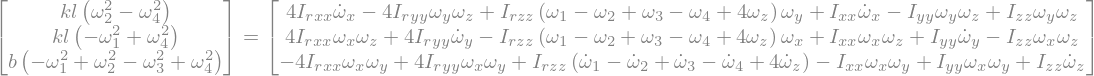

'Posición:'

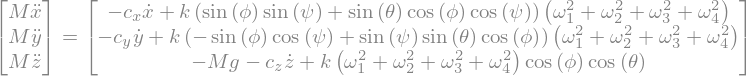

In [53]:
orientacion = smp.Eq(N, omega.cross(Icuerpo*omega) + Icuerpo*domega + omega.cross(Irotor*omega_rotor) + Irotor*smp.diff(omega_rotor,t))
posicion = smp.Eq(M*ddrp, R.T*T - smp.Matrix([cx*drp[0], cy*drp[1], cz*drp[2]]) - smp.Matrix([0,0,M*g]))

display("Ecuaciones generales del movimiento del cuadricóptero:")
display("Orientación:")
display(orientacion)
display("Posición:")
display(posicion)

## Ecuaciones del movimiento simplificadas

'Ecuaciones generales del movimiento del cuadricóptero:'

'Orientación:'

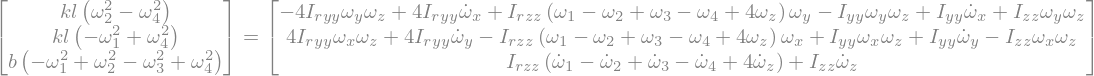

'Posición:'

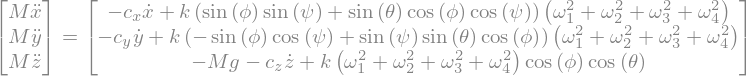

In [54]:
orientacion = orientacion.subs([(Irxx,Iryy),(Ixx,Iyy)])

display("Ecuaciones generales del movimiento del cuadricóptero:")
display("Orientación:")
display(orientacion)
display("Posición:")
display(posicion)

'Ecuaciones del movimiento simplificadas:'

'Orientación:'

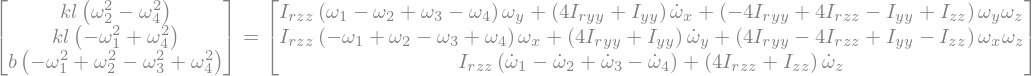

'Posición:'

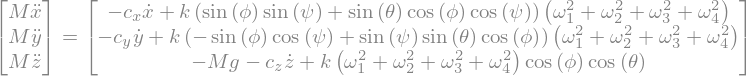

In [56]:
vars_to_collect = list(omega) +[omy*omz, omx*omz, Irzz*omy, Irzz*omx]+ list(domega) + list(Irotor)

aux2 = (orientacion.rhs).applyfunc(lambda e: smp.collect(smp.expand(e), vars_to_collect))
orientacion = smp.Eq(orientacion.lhs, aux2)

display("Ecuaciones del movimiento simplificadas:")
display("Orientación:")
display(orientacion)
display("Posición:")
display(posicion)